## Ejemplo 5: Binnings Hexagonales

### 1. Objetivos:
    - Aprender a generar e interpretar binnings hexagonales
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


Por ejemplo, mira qué pasa cuando queremos visualizar la relación entre peso y altura utilizando todos los datos de nuestro dataset:

In [4]:
df_grouped = df.groupby('name')[['height', 'weight']].max()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


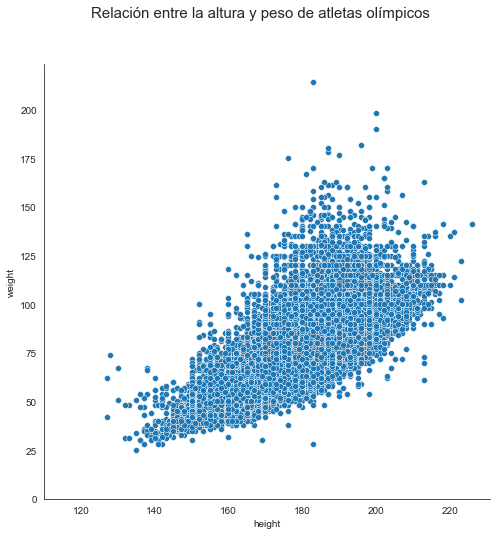

In [5]:
sns.set_style('white')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

sns.scatterplot(df_grouped['height'], df_grouped['weight'], ax=ax);

fig.suptitle('Relación entre la altura y peso de atletas olímpicos', fontsize=15)

ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")

ax.set_xlim(110)
ax.set_ylim(0);

Aunque podemos ver una forma más o menos distinguible, hay tantos puntos que es imposible discernir dónde hay más o menos densidad. Veamos ahora cómo se ven estos mismos datos pero con un binning hexagonal:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


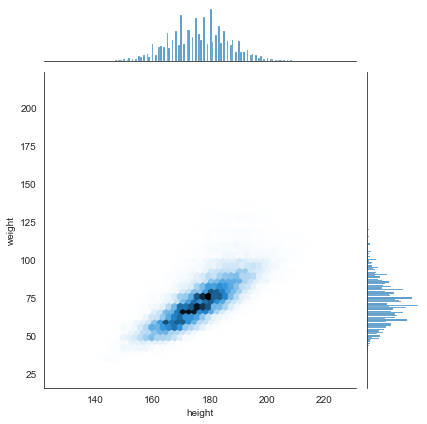

In [6]:
sns.jointplot('height', 'weight', data=df_grouped, kind='hex', ratio=5, joint_kws={'gridsize': 50});

Esta gráfica permite que visualicemos con mucho más detalle la distribución de nuestros datos. Observa también los histogramas que se encuentran en la parte superior y derecha de la gráfica. Estos histogramas nos ayudan a visualizar de qué manera participa cada variable en la densidad resultante.